In [1]:
#This part of the code imports necessary libraries, sets options for displaying DataFrame columns, and reads the dataset from 'soccer.csv'.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

# Q1: What is the total number of goals scored in the entire dataset?




In [5]:
#Calculates and prints the total number of goals scored across all rows in the dataset.
total_goals = df['Goals'].sum()

In [6]:
print("Total goals scored:", total_goals)

Total goals scored: 7795


# Q2: Which player has scored the most goals as a substitution

In [7]:
#Finds the player who has scored the most goals as a substitution by filtering the DataFrame for rows where #the 'Substitution ' column is greater than 0, sorting by goals in descending order, and then selecting the first row's 'Player Names' value.

substitution_max_goals_player = df[df['Substitution '] > 0].sort_values('Goals', ascending=False).iloc[0]['Player Names']


In [8]:
print("Player with most goals as a substitution:", substitution_max_goals_player)

Player with most goals as a substitution: Lionel Messi


# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [9]:
#Finds the top 5 players with the most goals by using the nlargest() function on the DataFrame and then printing their names and goal counts.
top_players = df.nlargest(5, 'Goals')[['Player Names', 'Goals']]

In [10]:
print("Top 5 players with most goals:")
print(top_players)

Top 5 players with most goals:
          Player Names  Goals
5    Cristiano Ronaldo     42
12        Lionel Messi     37
195       Lionel Messi     36
317        Carlos Vela     36
391      Ciro Immobile     36


# Q4: What are the top 10 countries with the most number of players in the dataset?

In [11]:
#Counts the occurrences of each unique country in the 'Country' column, then selects the top 10 most frequent countries and prints their counts.
top_countries = df['Country'].value_counts().head(10)

In [12]:
print("Top 10 countries with most players:")
print(top_countries)

Top 10 countries with most players:
Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: Country, dtype: int64


# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [13]:
#Calculates the lower and upper quantiles for the 'Mins' column, filters the DataFrame to keep rows within that range, and then calculates the difference in the number of rows between the original DataFrame and the filtered one.

lower_quantile = df['Mins'].quantile(0.01)
upper_quantile = df['Mins'].quantile(0.99)
filtered_df = df[(df['Mins'] >= lower_quantile) & (df['Mins'] <= upper_quantile)]
rows_difference = df.shape[0] - filtered_df.shape[0]

In [14]:
print("Difference in number of rows:", rows_difference)

Difference in number of rows: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [15]:
#Groups the DataFrame by player names, sums up the goals for each player, and then selects the top 5 players with the most goals across all years.

top_players_all_years = df.groupby('Player Names')['Goals'].sum().nlargest(5)

In [16]:
print("Top 5 players with most goals across all years:")
print(top_players_all_years)

Top 5 players with most goals across all years:
Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

In [17]:
#The code focuses on Cristiano Ronaldo's data, groups it by year, sums up the goals for each year and then find the most number of goals.

ronaldo_most_goals_year = df[df['Player Names'] == 'Cristiano Ronaldo'].groupby('Year')['Goals'].sum().idxmax()

In [18]:
print("Year with most goals by Cristiano Ronaldo:", ronaldo_most_goals_year)

Year with most goals by Cristiano Ronaldo: 2016


# Q8. In the year 2019 who has more Goals between Ronaldo and Messi?
- First print them normally
- Display the comparison using a bar plot

In [19]:
#compares the goal-scoring performance of Cristiano Ronaldo and Lionel Messi specifically for the year 2019. The code filters the dataset to include data only from 2019 for both players, calculates their respective total goals, and then presents the comparison through print statements and a bar plot.

ronaldo_goals_2019 = df[(df['Player Names'] == 'Cristiano Ronaldo') & (df['Year'] == 2019)]['Goals'].sum()
messi_goals_2019 = df[(df['Player Names'] == 'Lionel Messi') & (df['Year'] == 2019)]['Goals'].sum()

In [20]:
print("Ronaldo goals in 2019:", ronaldo_goals_2019)
print("Messi goals in 2019:", messi_goals_2019)


Ronaldo goals in 2019: 31
Messi goals in 2019: 25


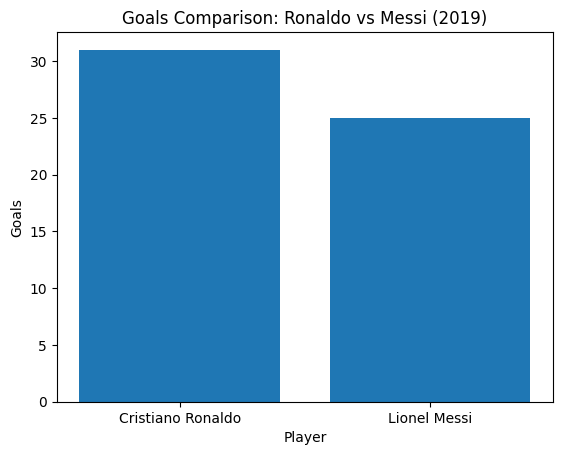

In [21]:
players = ['Cristiano Ronaldo', 'Lionel Messi']
goals = [ronaldo_goals_2019, messi_goals_2019]

plt.bar(players, goals)
plt.title("Goals Comparison: Ronaldo vs Messi (2019)")
plt.xlabel("Player")
plt.ylabel("Goals")
plt.show()

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

In [22]:
# A pie chart is created to visualize the distribution of the dataset among different countries. The code computes the count of entries for each country, and then represents this distribution using a pie chart where each slice corresponds to a country and its size represents the percentage of the dataset it holds.

country_data = df['Country'].value_counts()

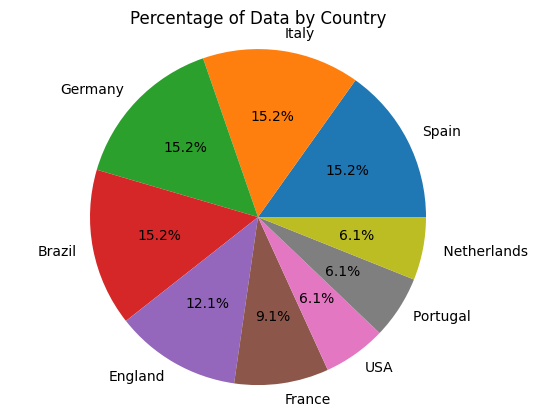

In [23]:
plt.pie(country_data, labels=country_data.index, autopct='%1.1f%%')
plt.title("Percentage of Data by Country")
plt.axis('equal')
plt.show()

# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

<ipython-input-24-ceadb823c271>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


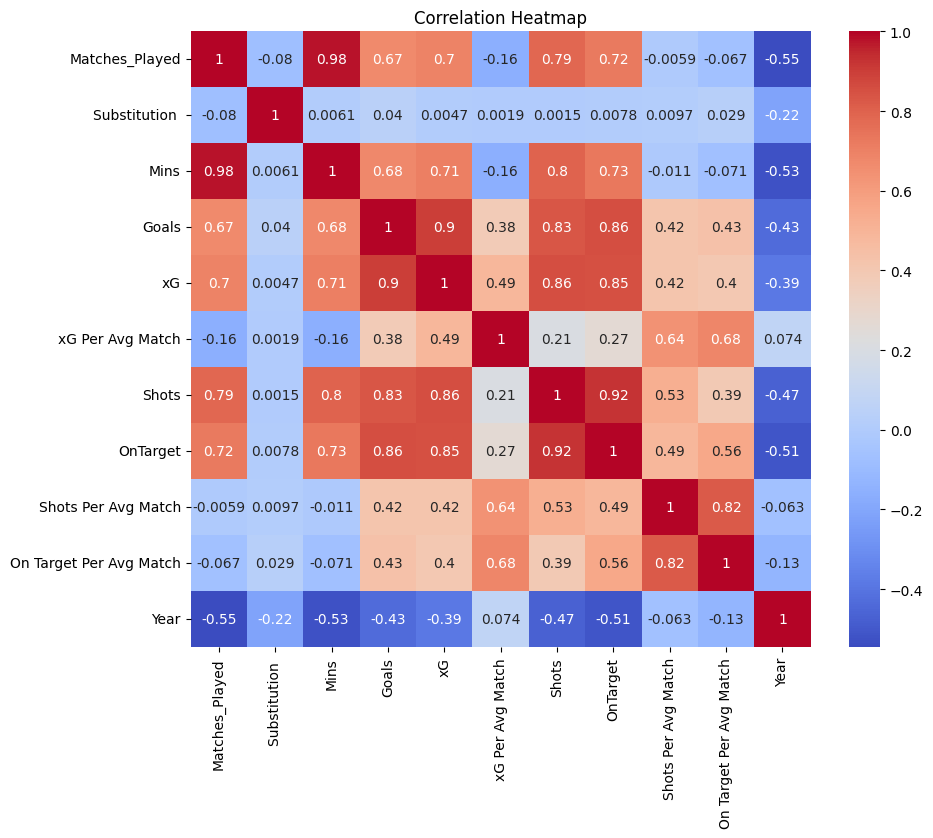

In [24]:
#This question aims to visualize the relationships (correlation) between different columns in the dataset through a heatmap. The code generates a correlation matrix, which measures the linear relationships between variables. It then uses a heatmap to display these correlations, with numerical values printed within each cell to indicate the strength and direction of the correlation.

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [25]:
# This question focuses on finding the country that has the highest median 'OnTarget' shots in the year 2020. The code first filters the data for the year 2020, groups it by country, calculates the median 'OnTarget' shots for each country, and finally identifies the country with the highest median value.

max_median_ontarget_country = df[df['Year'] == 2020].groupby('Country')['OnTarget'].median().idxmax()

In [26]:
print("Country with maximum median OnTarget Shots in 2020:", max_median_ontarget_country)


Country with maximum median OnTarget Shots in 2020:  Netherlands


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [27]:
# The code filters the dataset to include players with over 30 games, calculates the goals per minute for each, computes the mean goals per minute, and then selects the player with the highest average.

min_games = 30

In [28]:
qualified_players = df[df['Matches_Played'] > min_games]
qualified_players['Goals_per_minute'] = qualified_players['Goals'] / qualified_players['Mins']
best_avg_goals_per_minute = qualified_players.groupby('Player Names')['Goals_per_minute'].mean().idxmax()

<ipython-input-28-7d6206b32ab3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified_players['Goals_per_minute'] = qualified_players['Goals'] / qualified_players['Mins']


In [29]:
print("Player with best average Goals per minute:", best_avg_goals_per_minute)

Player with best average Goals per minute: Carlos Vela


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [30]:
# The code calculates the number of missed shots for each player and then determines the player with the lowest and highest values.

df['Missed_Shots'] = df['Shots'] - df['OnTarget']
least_missed_shots_player = df.loc[df['Missed_Shots'].idxmin()]['Player Names']
most_missed_shots_player = df.loc[df['Missed_Shots'].idxmax()]['Player Names']

In [31]:
print("Player with least missed shots:", least_missed_shots_player)
print("Player with most missed shots:", most_missed_shots_player)

Player with least missed shots: Esteban Burgos
Player with most missed shots: Cristiano Ronaldo


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

In [32]:
# The code filters the dataset for players with over 35 matches, groups it by country, counts the occurrences of each country, and finally represents this count for each country using a bar plot.

countries_over_35_matches = df[df['Matches_Played'] > 35]['Country'].nunique()

In [33]:
print("Number of countries with players over 35 matches:", countries_over_35_matches)


Number of countries with players over 35 matches: 5


# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

<Figure size 1000x600 with 0 Axes>

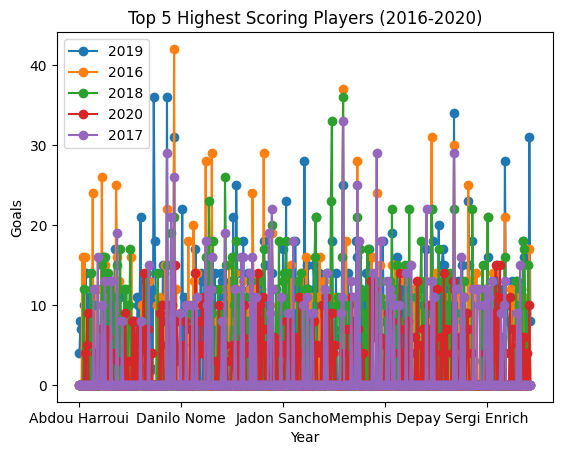

In [34]:
# The code groups the data by player names and years, calculates the total goals for each player-year combination, selects the top 5 players, and then generates a line chart to show their goal-scoring trends over the years.


top_players_years = df.groupby(['Player Names', 'Year'])['Goals'].sum().unstack().fillna(0)
top_players_years = top_players_years.transpose()  # Transpose to have years as index
top_players_years = top_players_years.nlargest(5, columns=top_players_years.columns).transpose()

plt.figure(figsize=(10, 6))
top_players_years.plot(kind='line', marker='o')
plt.title("Top 5 Highest Scoring Players (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Goals")
plt.legend()
plt.show()
